In [2]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score,calinski_harabasz_score,classification_report,confusion_matrix

from scipy.spatial.distance import pdist,squareform
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy import stats



# Data Exploration : Wine Data
***

## 1. Data Loading and Exploration

In [3]:
url='https://storage.googleapis.com/the_public_bucket/wine-clustering.csv'
df_wine=pd.read_csv(url)

In [4]:
df_wine.head(3)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


#### The dataset contains 178 records and has **no missing values**. It consists of 13 numeric columns corresponding to physical and chemical properties of wines.

In [6]:
df_wine.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

#### To obtain an overview of the distribution and dispersion of the data, the describe function was used, which provides a statistical summary of the columns. According to the results, it is determined that there are no outliers or erroneous values in the data.To complement this information, histograms for all variables were generated.

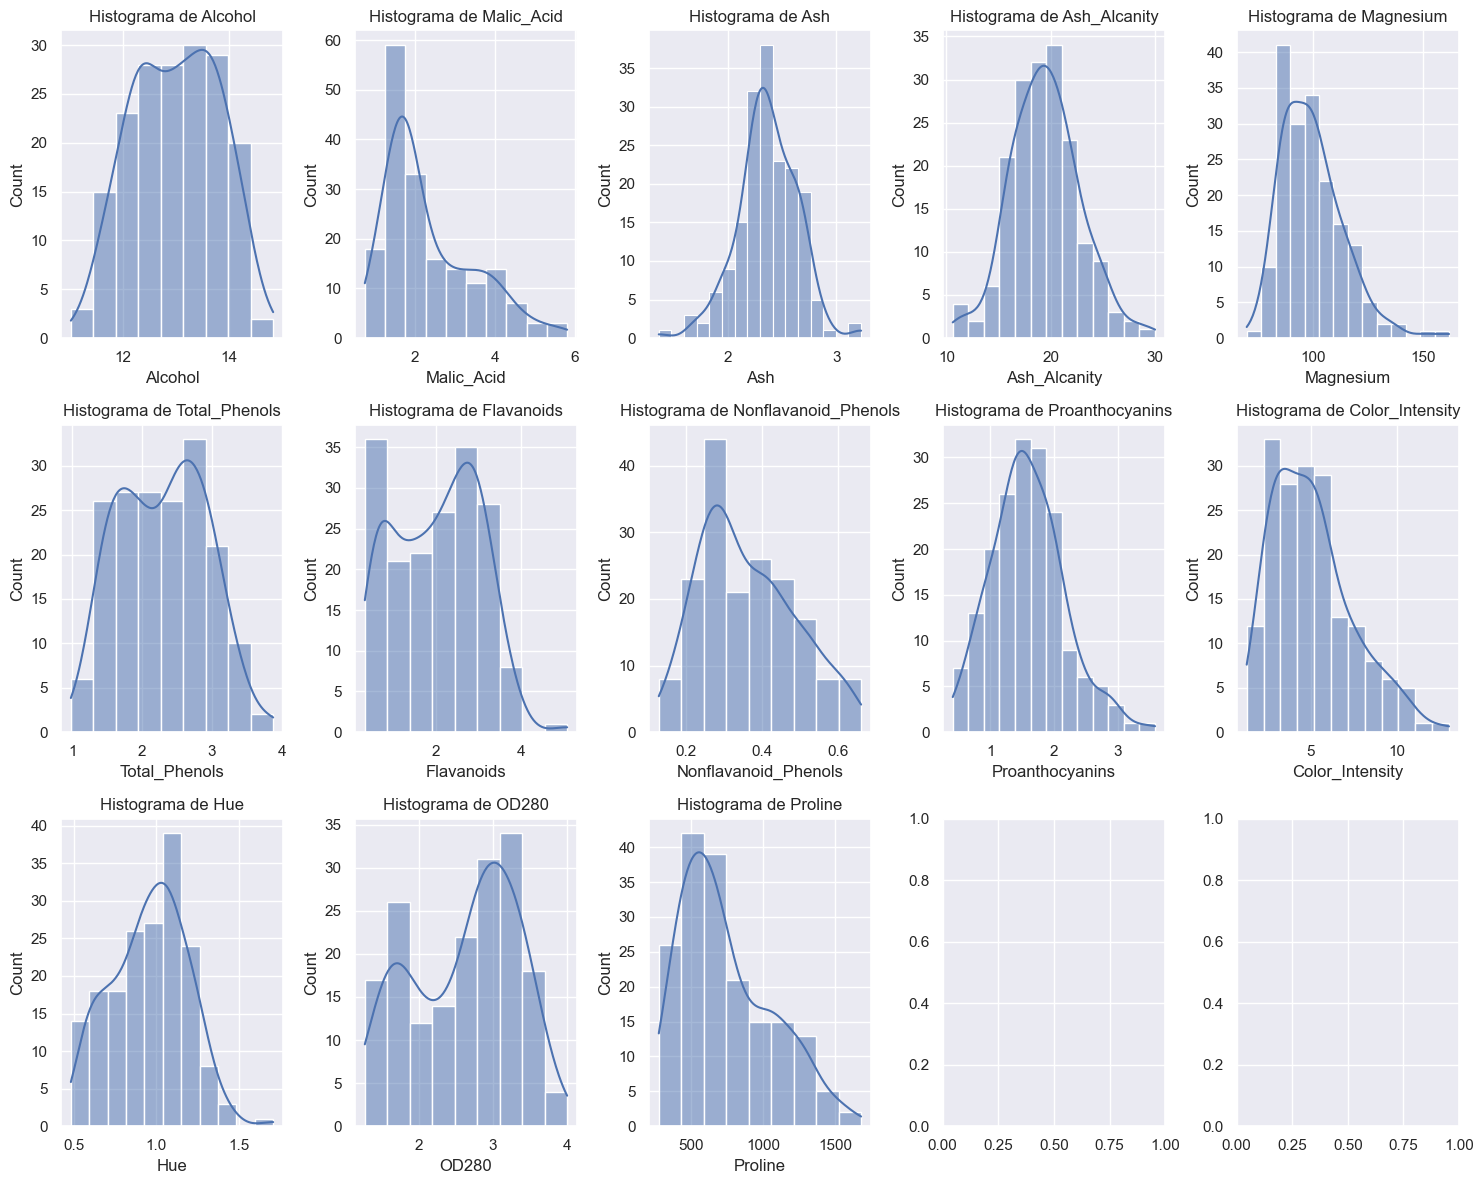

In [7]:

columnas_por_fila = 5
num_filas = (len(df_wine.columns) // columnas_por_fila) + (len(df_wine.columns) % columnas_por_fila > 0)

#  subplots
fig, axs = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 4 * num_filas))
axs = axs.flatten()

# histograms
for i, column in enumerate(df_wine.columns):
    sns.histplot(df_wine[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Histograma de {column}')

plt.tight_layout()
plt.show()


#### The Shapiro-Wilk test was applied to determine if the variables followed a normal distribution.

In [8]:
for column in df_wine.columns:
    _, p_valor = shapiro(df_wine[column])

    # condition significancy level 0.05
    if p_valor < 0.05:
        print(f' {column} not normal.\n')
    else:
        print(f'{column}  normal.\n')

 Alcohol not normal.

 Malic_Acid not normal.

 Ash not normal.

Ash_Alcanity  normal.

 Magnesium not normal.

 Total_Phenols not normal.

 Flavanoids not normal.

 Nonflavanoid_Phenols not normal.

 Proanthocyanins not normal.

 Color_Intensity not normal.

 Hue not normal.

 OD280 not normal.

 Proline not normal.



## 2.Correlation Analysis

### 2.1 Correlation coefficient

To study the correlation between the characteristics, two correlation coefficients were evaluated:

* Pearson coefficient, which is the most common, assumes that the features follow a normal distribution. In this case, many of the characteristics do not have a strictly normal distribution. However, there is a sufficient amount of data to give robustness to this coefficient, and it could be used.

* Spearman coefficient, which does not assume normality of the features or the presence of a linear relationship between them. 

Although both could be applied, I will use the Spearman coefficient since we know a priori that some characteristics deviate from the normal distribution.

p-value was considered to identify significant correlations


Using the following functions, a heatmap of the correlation matrix is generated in which only the coefficients that are significant considering an alpha of 0.01 are visualized.

In [9]:
# Generate a matrix with p-values
def corr_sig_spearman(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

In [10]:
# Plot a correlation heatmap using a mask
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

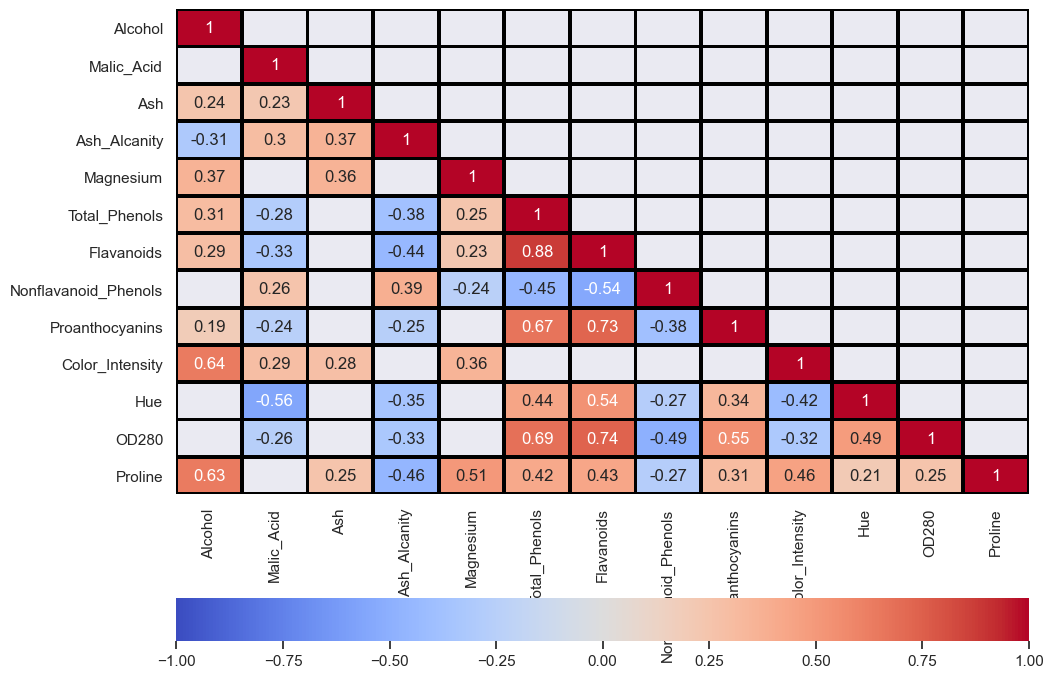

In [11]:
# Plotting with significance filter
corr = df_wine.corr('spearman')                            # get correlation
p_values = corr_sig_spearman(df_wine)                     # get p-Value
mask = np.invert(np.tril(p_values<0.01))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

 
### The following correlations are observed:
> ####  The content of Alcohol and Proline are positively correlated. As the alcohol content in a wine increases, the Proline content also increases.
> #### The hue is negatively correlated with malic acid and positively correlated with flavonoids. Wines with lower values of malic acid and higher values of flavonoids exhibit higher hues.
> #### Total_phenols is strongly correlated with Flavanoids and Proanthocyanins, which is expected since Flavanoids and Proanthocyanins are included in the total_phenols category.
> #### The color intensity is positively correlated with the alcohol content of the wine. There is also a negative correlation between the color intensity of the wine and its hue. Wines with more intense colors have lower hue.
> #### The OD280 is strongly correlated with flavonoid phenolic compounds. Also Wines with higher hues have a higher OD280 coefficient.


### 2.2 Correlation ScatterPlot

A scatter plot is usefull to analyze the nature of correlations that were calculated and plotted on the heatmap. In this type of graph, it can be observed that there are no outliers in the variables. A trend is noticeable in pairs of variables that exhibited the highest correlation coefficients.

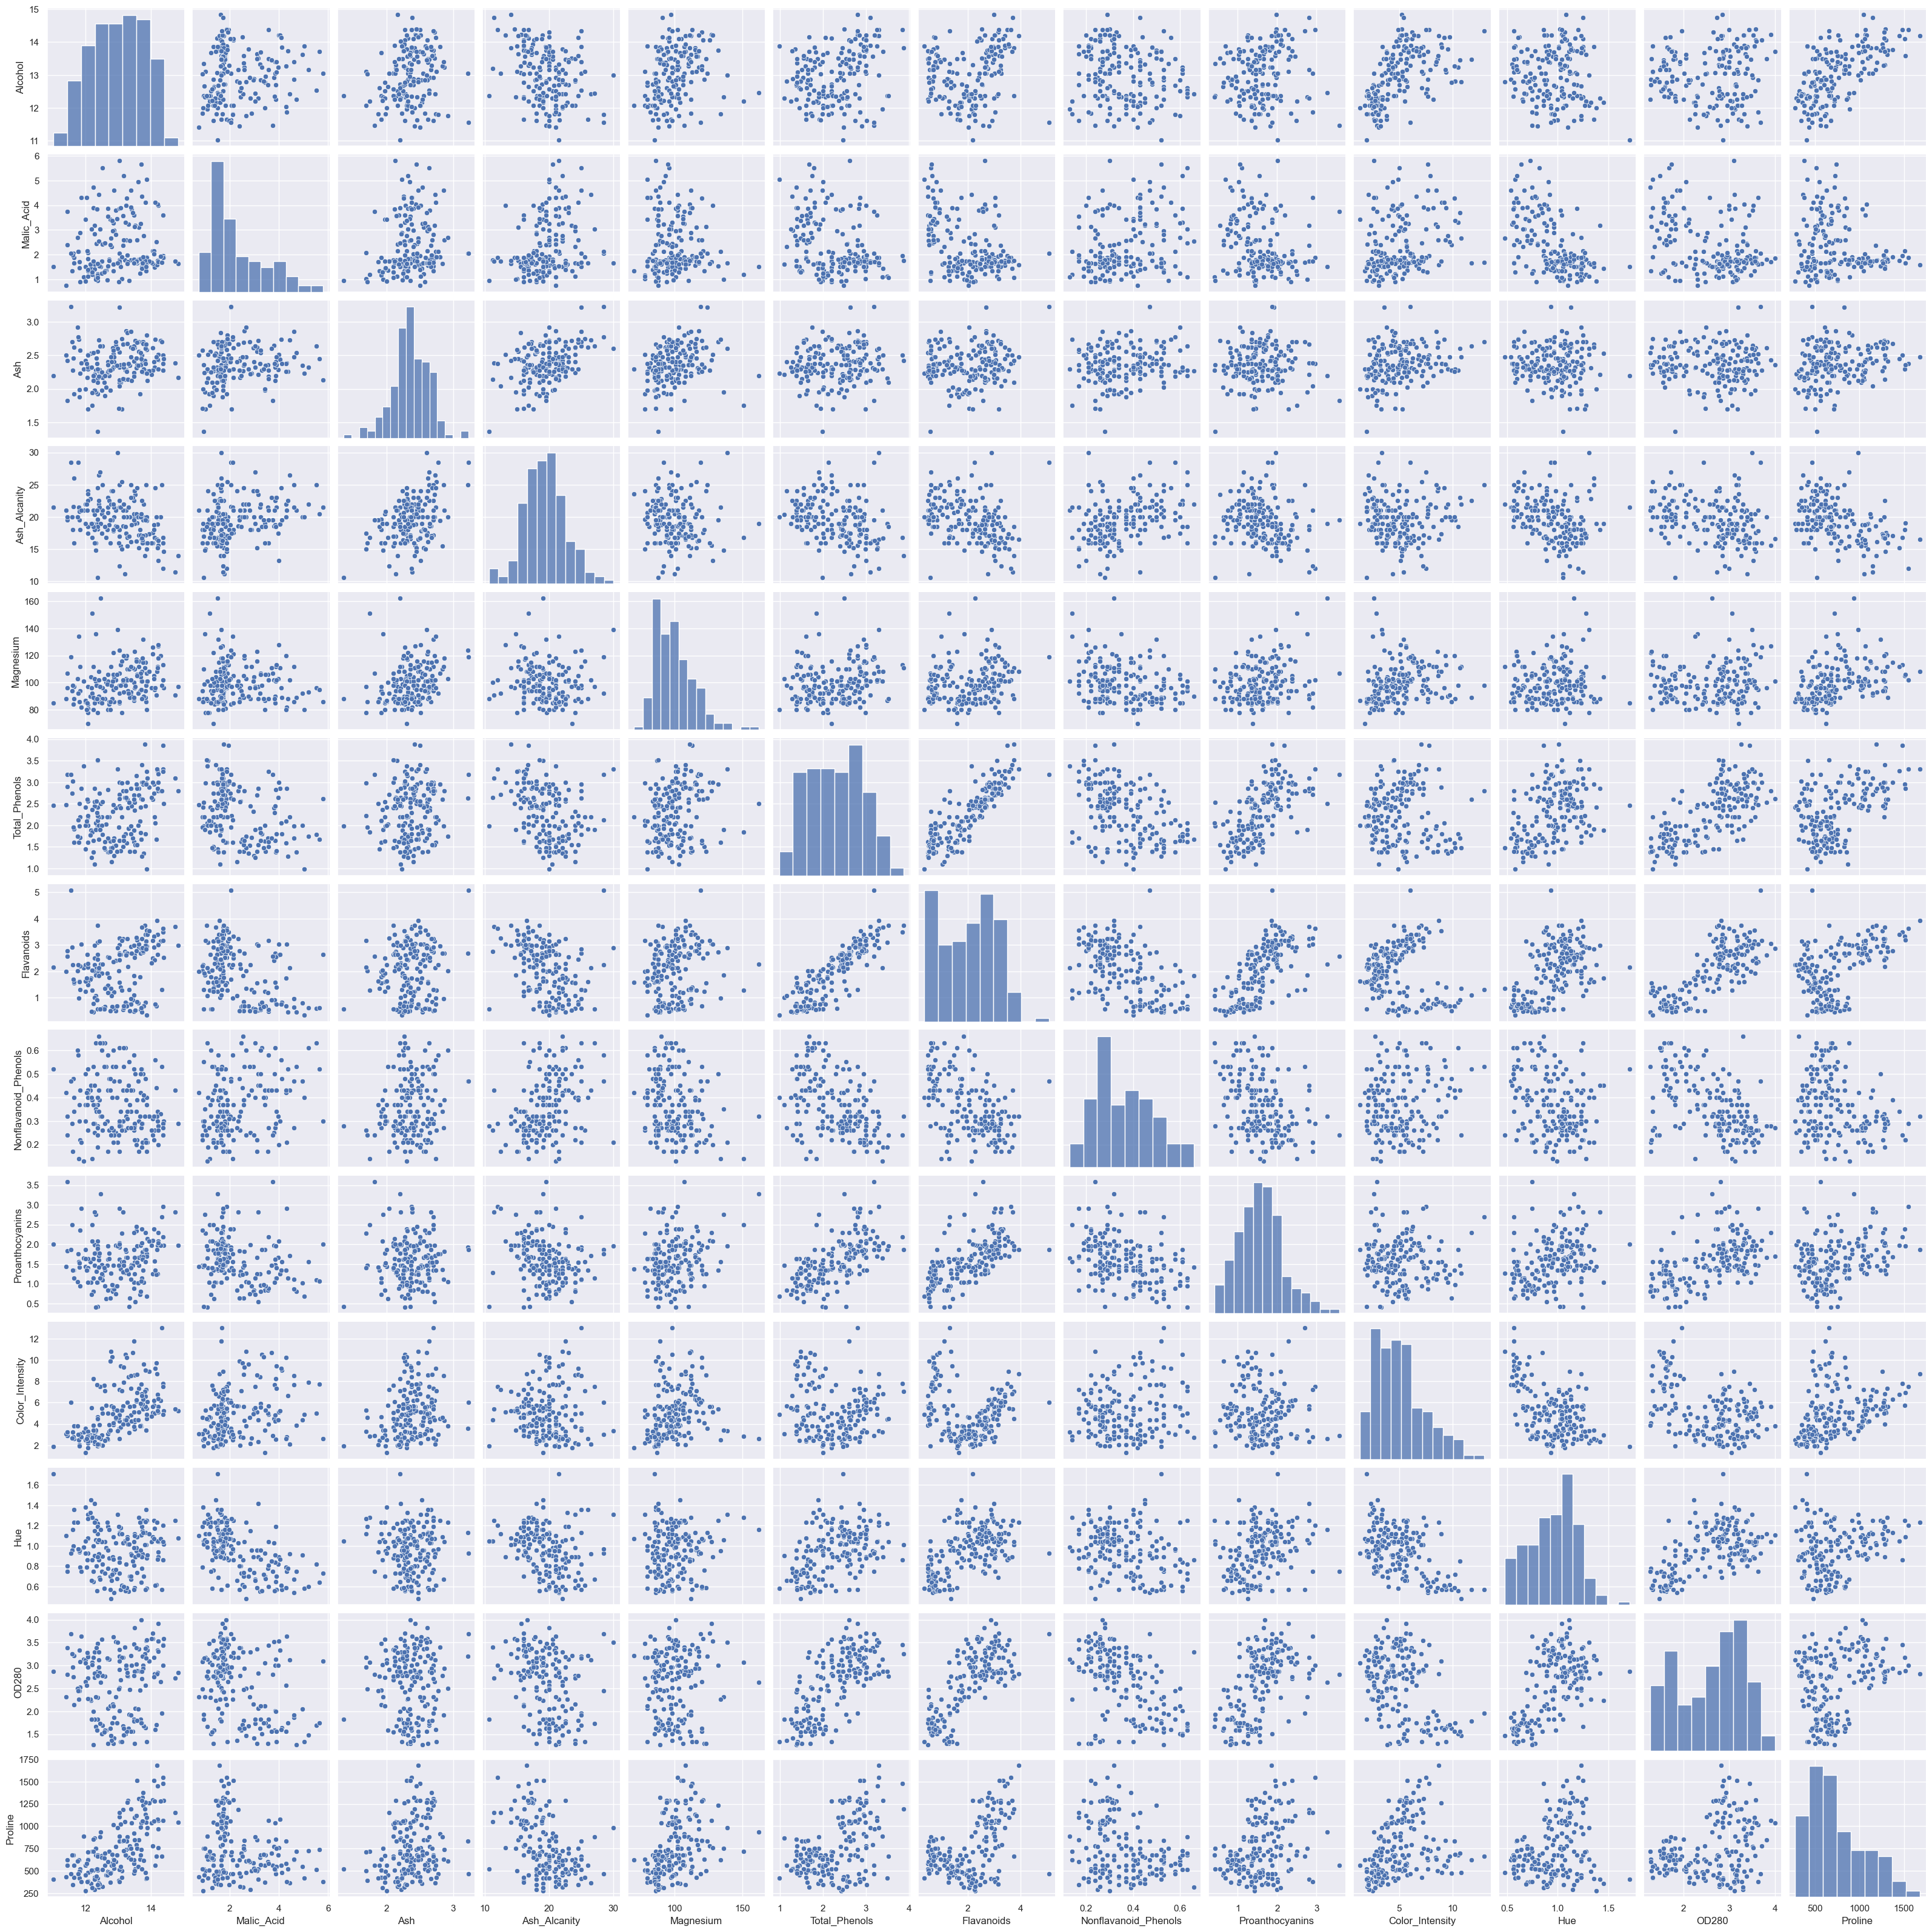

In [12]:
sns.pairplot(df_wine)

When examining scatter plots of color intensity, we observe that, as indicated by the heatmap, alcohol is the variable most correlated with this characteristic. The correlation coefficient between color intensity and flavonoids does not show a high or significant r value, but by observing the scatter plot, two groups of points with different behaviors can be identified, one of which shows correlation between color intensity and flavonoids. A similar pattern is observed in the scatter plot of color intensity and proline.

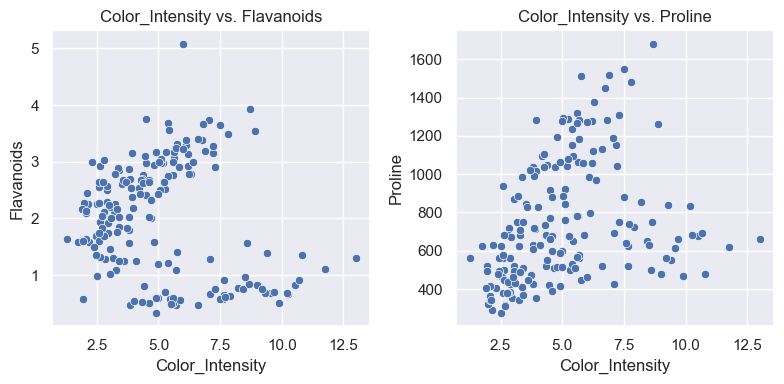

In [13]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Color_Intensity vs. Flavanoids
sns.scatterplot(data=df_wine, x='Color_Intensity', y='Flavanoids', ax=axes[0])
axes[0].set_title('Color_Intensity vs. Flavanoids')

#Color_Intensity vs. Proline
sns.scatterplot(data=df_wine, x='Color_Intensity', y='Proline', ax=axes[1])
axes[1].set_title('Color_Intensity vs. Proline')

plt.tight_layout()

plt.show()


## 3. Clustering Model

### 3.1 KMeans
***


Implementation of the KMeans algorithm.

To start, the inertia (sum of squared distances to the centroids) is plotted as a function of K. This measure is stored in the 'inertia_' property of the trained KMeans object. Following the elbow rule, the preferred value of K is selected.<br>
The data is scaled because Kmeans  uses distances.

In [14]:
#Data scaling
scaler=StData scalingandardScaler()
X=scaler.fit_transform(df_wine)

inertia=[]
sil=[]
ch_scores=[]
k_values=range(1,20,2)

for k in k_values:
    km=KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)    

Text(0, 0.5, 'Inertia')

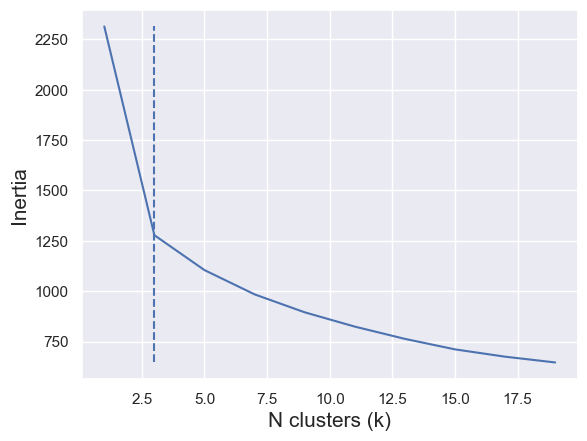

In [15]:
plt.plot(k_values,inertia);
plt.vlines(3,np.min(inertia),np.max(inertia),linestyle='dashed');
plt.xlabel('N clusters (k)',fontsize=15);plt.ylabel('Inertia',fontsize='15')

#### Following the elbow rule, the preferred value of K=3 is selected.

#### To confirm this value, the Silhouette  and the Calinski-Harabasz scores were calculated; both metrics reaffirmed the value of K=3.

*Silhouette score: measures how close a point is to the other points in its cluster, relative to how close it is to the points of the nearest cluster.*

*Calinski-Harabasz score: Measures the relationship between inter-cluster dispersion and intra-cluster dispersion.*

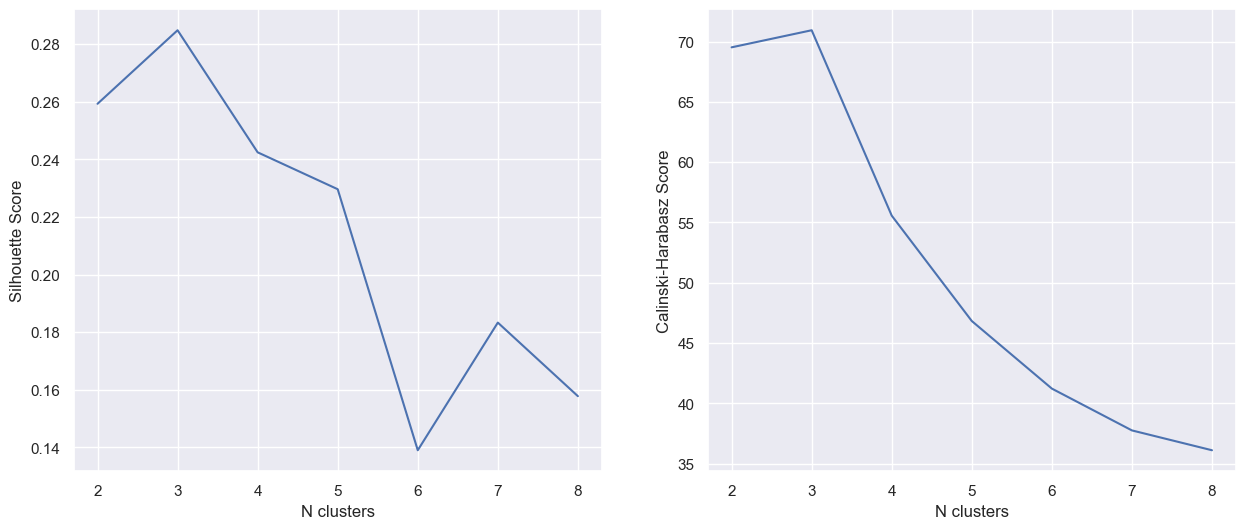

In [16]:
evaluation = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #predY = np.choose(labels, pd.Series(range(0,k+1)).astype(np.int64))
    silhouette = silhouette_score(X, labels, metric='euclidean')
    calinsky = calinski_harabasz_score(X, labels)      
    evaluation.append([k, silhouette, calinsky])
    #print("K= ", evaluation)

evaluation=np.array(evaluation);
f,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(evaluation[:,0],evaluation[:,1]) 
ax[0].set_ylabel('Silhouette Score')
ax[0].set_xlabel('N clusters')

ax[1].plot(evaluation[:,0],evaluation[:,2]) 
ax[1].set_ylabel('Calinski-Harabasz Score')    
ax[1].set_xlabel('N clusters');

In [17]:
# fit model
k = 3
km = KMeans(n_clusters=k, random_state=0)
km.fit(X)
df_wine_label=df_wine.copy()
# generate a new dataframe df_wine_labels including clustering labels. 
labels_kmeans= km.labels_
df_wine_label['Cluster'] = labels_kmeans 

#### Cluster Characteristics

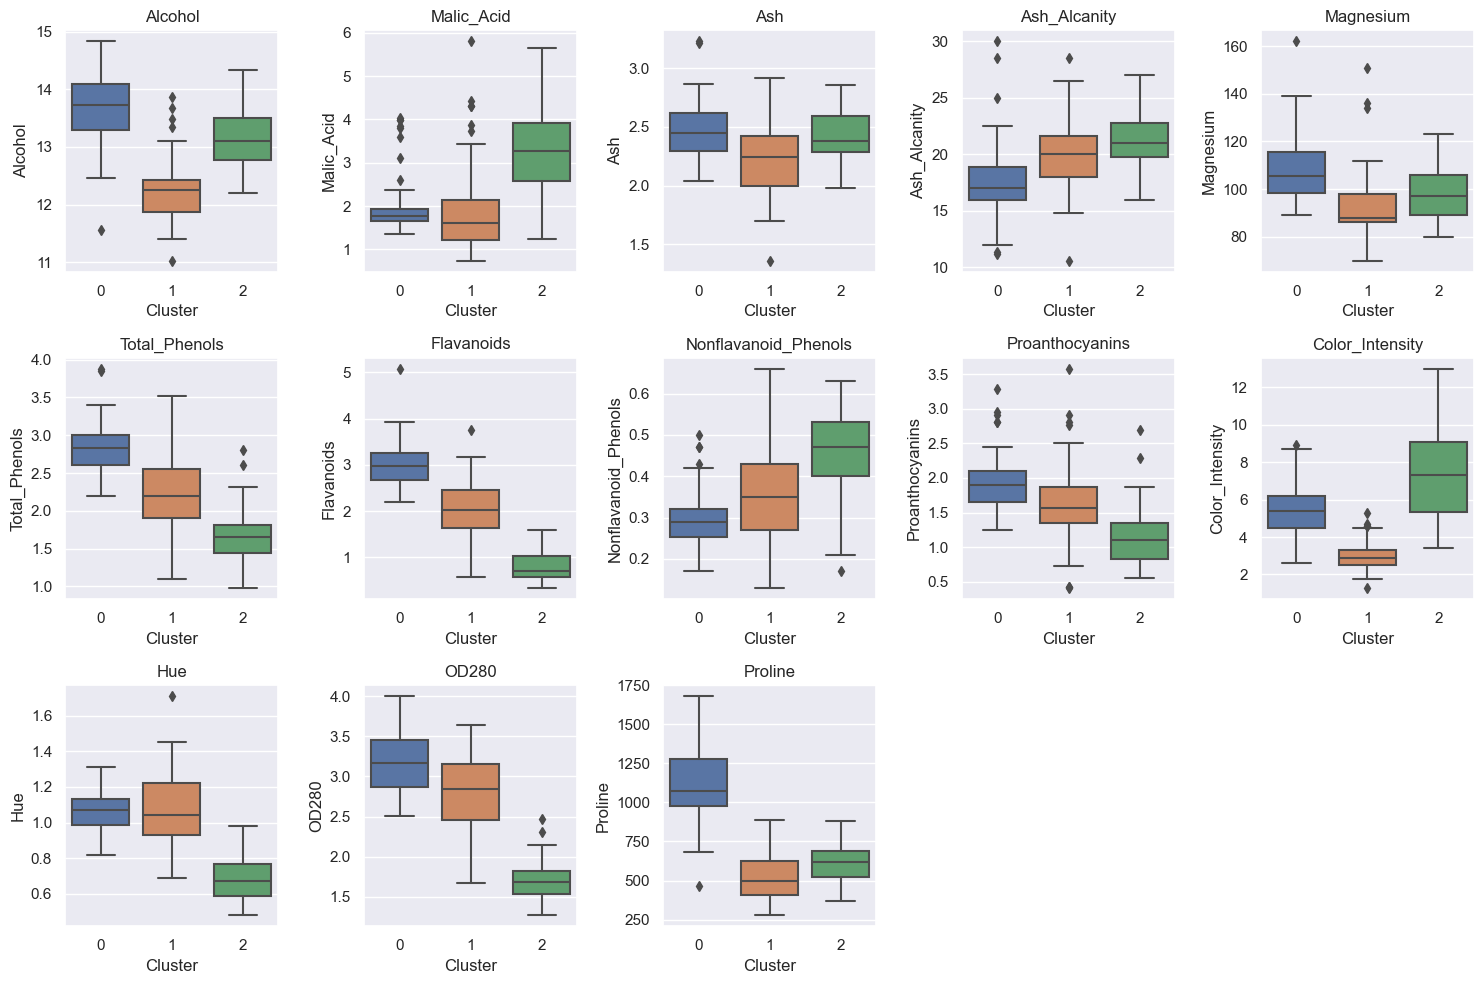

In [18]:

plt.figure(figsize=(15, 10))


for i, feature in enumerate(df_wine.columns):
    plt.subplot(3, 5, i + 1) 
    sns.boxplot(x="Cluster", y=feature, data=df_wine_label)
    plt.title(feature)
    
plt.tight_layout()
plt.show()


In [19]:
df_wine_label_gropued=df_wine_label.groupby('Cluster').mean()

In [20]:
df_wine_label_gropued

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        13.676774    1.997903  2.466290     17.462903  107.967742   
1        12.250923    1.897385  2.231231     20.063077   92.738462   
2        13.134118    3.307255  2.417647     21.241176   98.666667   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.847581    3.003226              0.292097         1.922097   
1             2.247692    2.050000              0.357692         1.624154   
2             1.683922    0.818824              0.451961         1.145882   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               5.453548  1.065484  3.163387  1100.225806  
1               2.973077  1.062708  2.803385   510.169231  
2               7.234706  0.691961  1.696667   619.058824

### 3.2 Hierarchical Clustering
***

Implementation of hierarchical clustering model using the 'ward' method.

In [21]:
Z = linkage(X, 'ward')

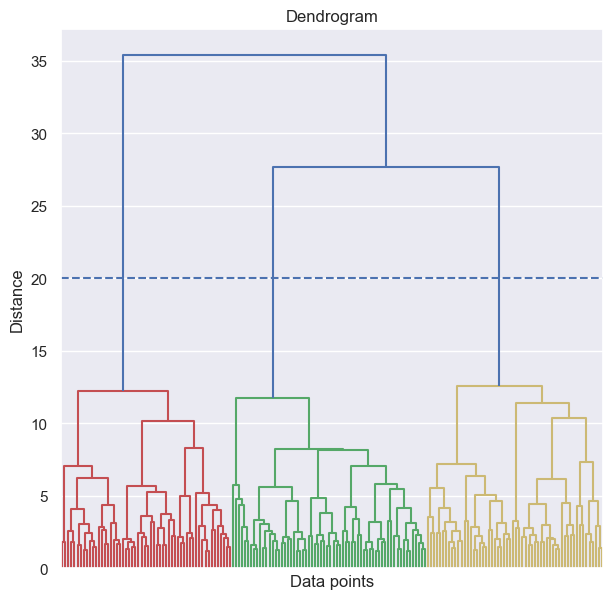

In [22]:
from scipy.cluster import hierarchy 

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')

color_palette=['r','g','y','m','c'];

hierarchy.set_link_color_palette(color_palette) 

dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=20,     
)
plt.hlines(20,0,2000,linestyle='--')
plt.xticks([])
plt.show()

#### In the dendrogram, a clear structure of 3 clusters can be observed

In [23]:
labels_jerarquico=fcluster(Z,3,criterion='maxclust');
labels_jerarquico

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [24]:
labels_jerarquico=fcluster(Z,3,criterion='maxclust');

# lable rename for clustering algorithms concordance
labels_jerarquico= np.where(labels_jerarquico == 3, 1, np.where(labels_jerarquico == 2, 0, np.where(labels_jerarquico == 1, 2, labels_jerarquico)))

df_wine_label_2=df_wine.copy()
df_wine_label_2['Cluster']=labels_jerarquico


### 3.3 DBSCAN
***

* eps determination using the k-distance curve.<br>
+ k is defined as minPts-1

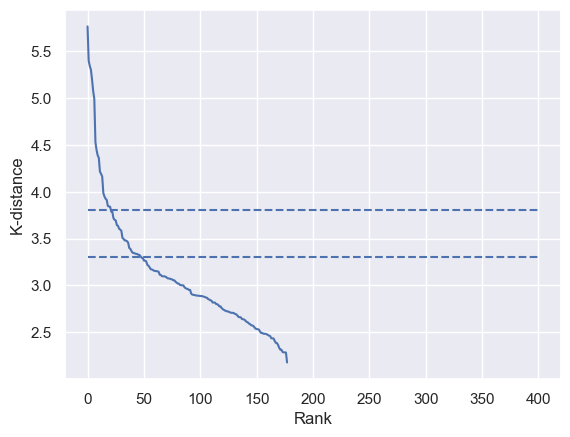

In [25]:
minPts=20;
k=minPts-1;

D=squareform(pdist(X));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([3.3,3.8],0,400,linestyles='dashed');

In [26]:
dbscan = DBSCAN(eps=3.5, min_samples=minPts)
labels_db = dbscan.fit_predict(X)


In [27]:
D.shape

(178, 178)

In [28]:
labels_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

#### The DBSCAN algorithm did not perform well for clustering on this dataset. This algorithm is effective in classifying when the density of data between clusters does not vary considerably, and that may not be the case with this dataset.

## 3.4 Comparison between clustering algorithms(Hierarchical Clustering and Kmeans).

### Malic_Acid vs Alcohol Hierarchical Clustering

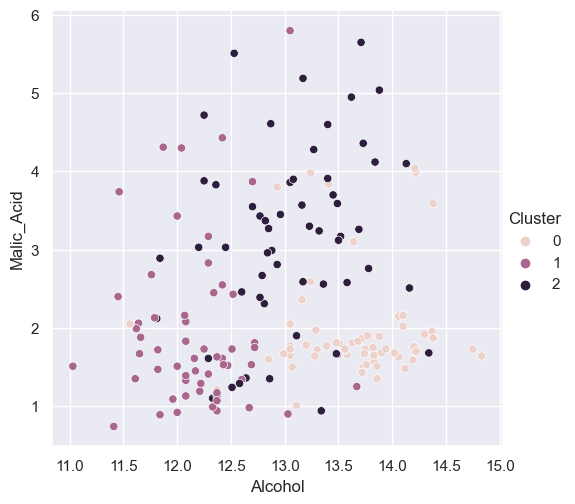

In [29]:
sns.relplot(data=df_wine_label_2, x='Alcohol', y='Malic_Acid', hue='Cluster')

### Malic_Acid vs Alcohol Kmeans

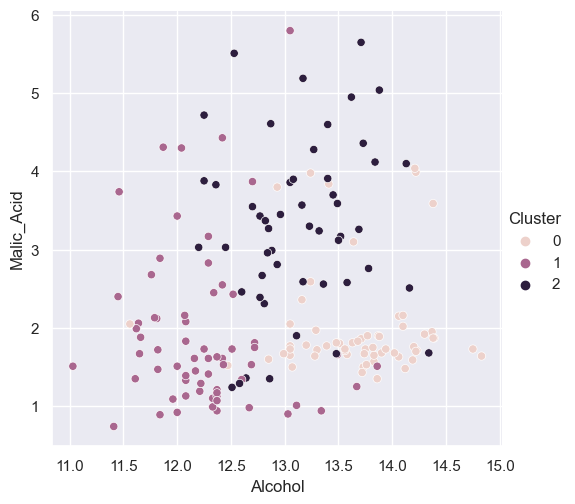

In [30]:
sns.relplot(data=df_wine_label, x='Alcohol', y='Malic_Acid', hue='Cluster')

In [31]:
labels_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
labels_jerarquico

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

I used the confusion_matrix method from scikit-learn to build this matrix, taking the values of the clusters predicted by k-means as if they were the true label values, and the values of the clusters predicted by hierarchical clustering as if they were the predicted ones.

But keep in mind that this is not the confusion matrix we are familiar with (because this is not a supervised learning problem), although this method serves to build the matrix that compares clustering algorithms.

In [33]:
from sklearn.metrics import confusion_matrix
confusion_cluster = confusion_matrix(labels_kmeans, labels_jerarquico)
print('K-means vs Jerárquico\n',confusion_cluster)

K-means vs Jerárquico
 [[61  1  0]
 [ 3 57  5]
 [ 0  0 51]]


#### Colclusion: both algorithms grouped the records in practically the same way

## 3.5 Visualization in a Reduced Dimensionality Space

The dataset's dimensionality was reduced using PCA, retaining two principal components.
The scatterplot illustrates the three clusters originally obtained in this reduced space.

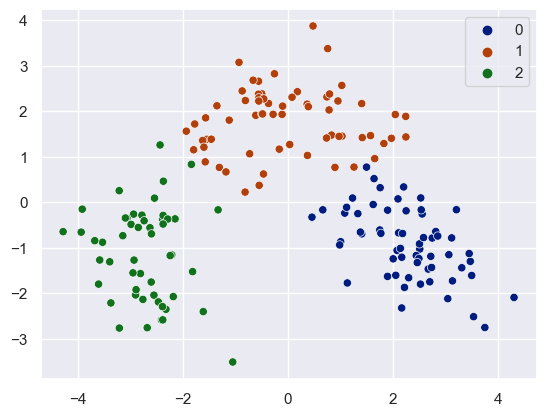

In [34]:
pca=PCA(n_components=2)
X_transformed=pca.fit_transform(X)

sns.scatterplot(x = X_transformed[:,0], y = X_transformed[:,1],hue=km.labels_,palette='dark');
loadings = pca.components_

# 4.  Characteristics of each cluster

### First Category:

- High alcohol content
- High levels of Phenols
- Moderate color intensity
- High Proline content
- High OD280

### Second Category:

- Low alcohol content
- Moderate levels of Phenols
- Low color intensity
- Low Proline content
- Moderate OD280

### Third Category:

- Intermediate alcohol content
- High Maleic Acid content
- Low Phenols content
- Low hue
- Low OD280
- High color intensity


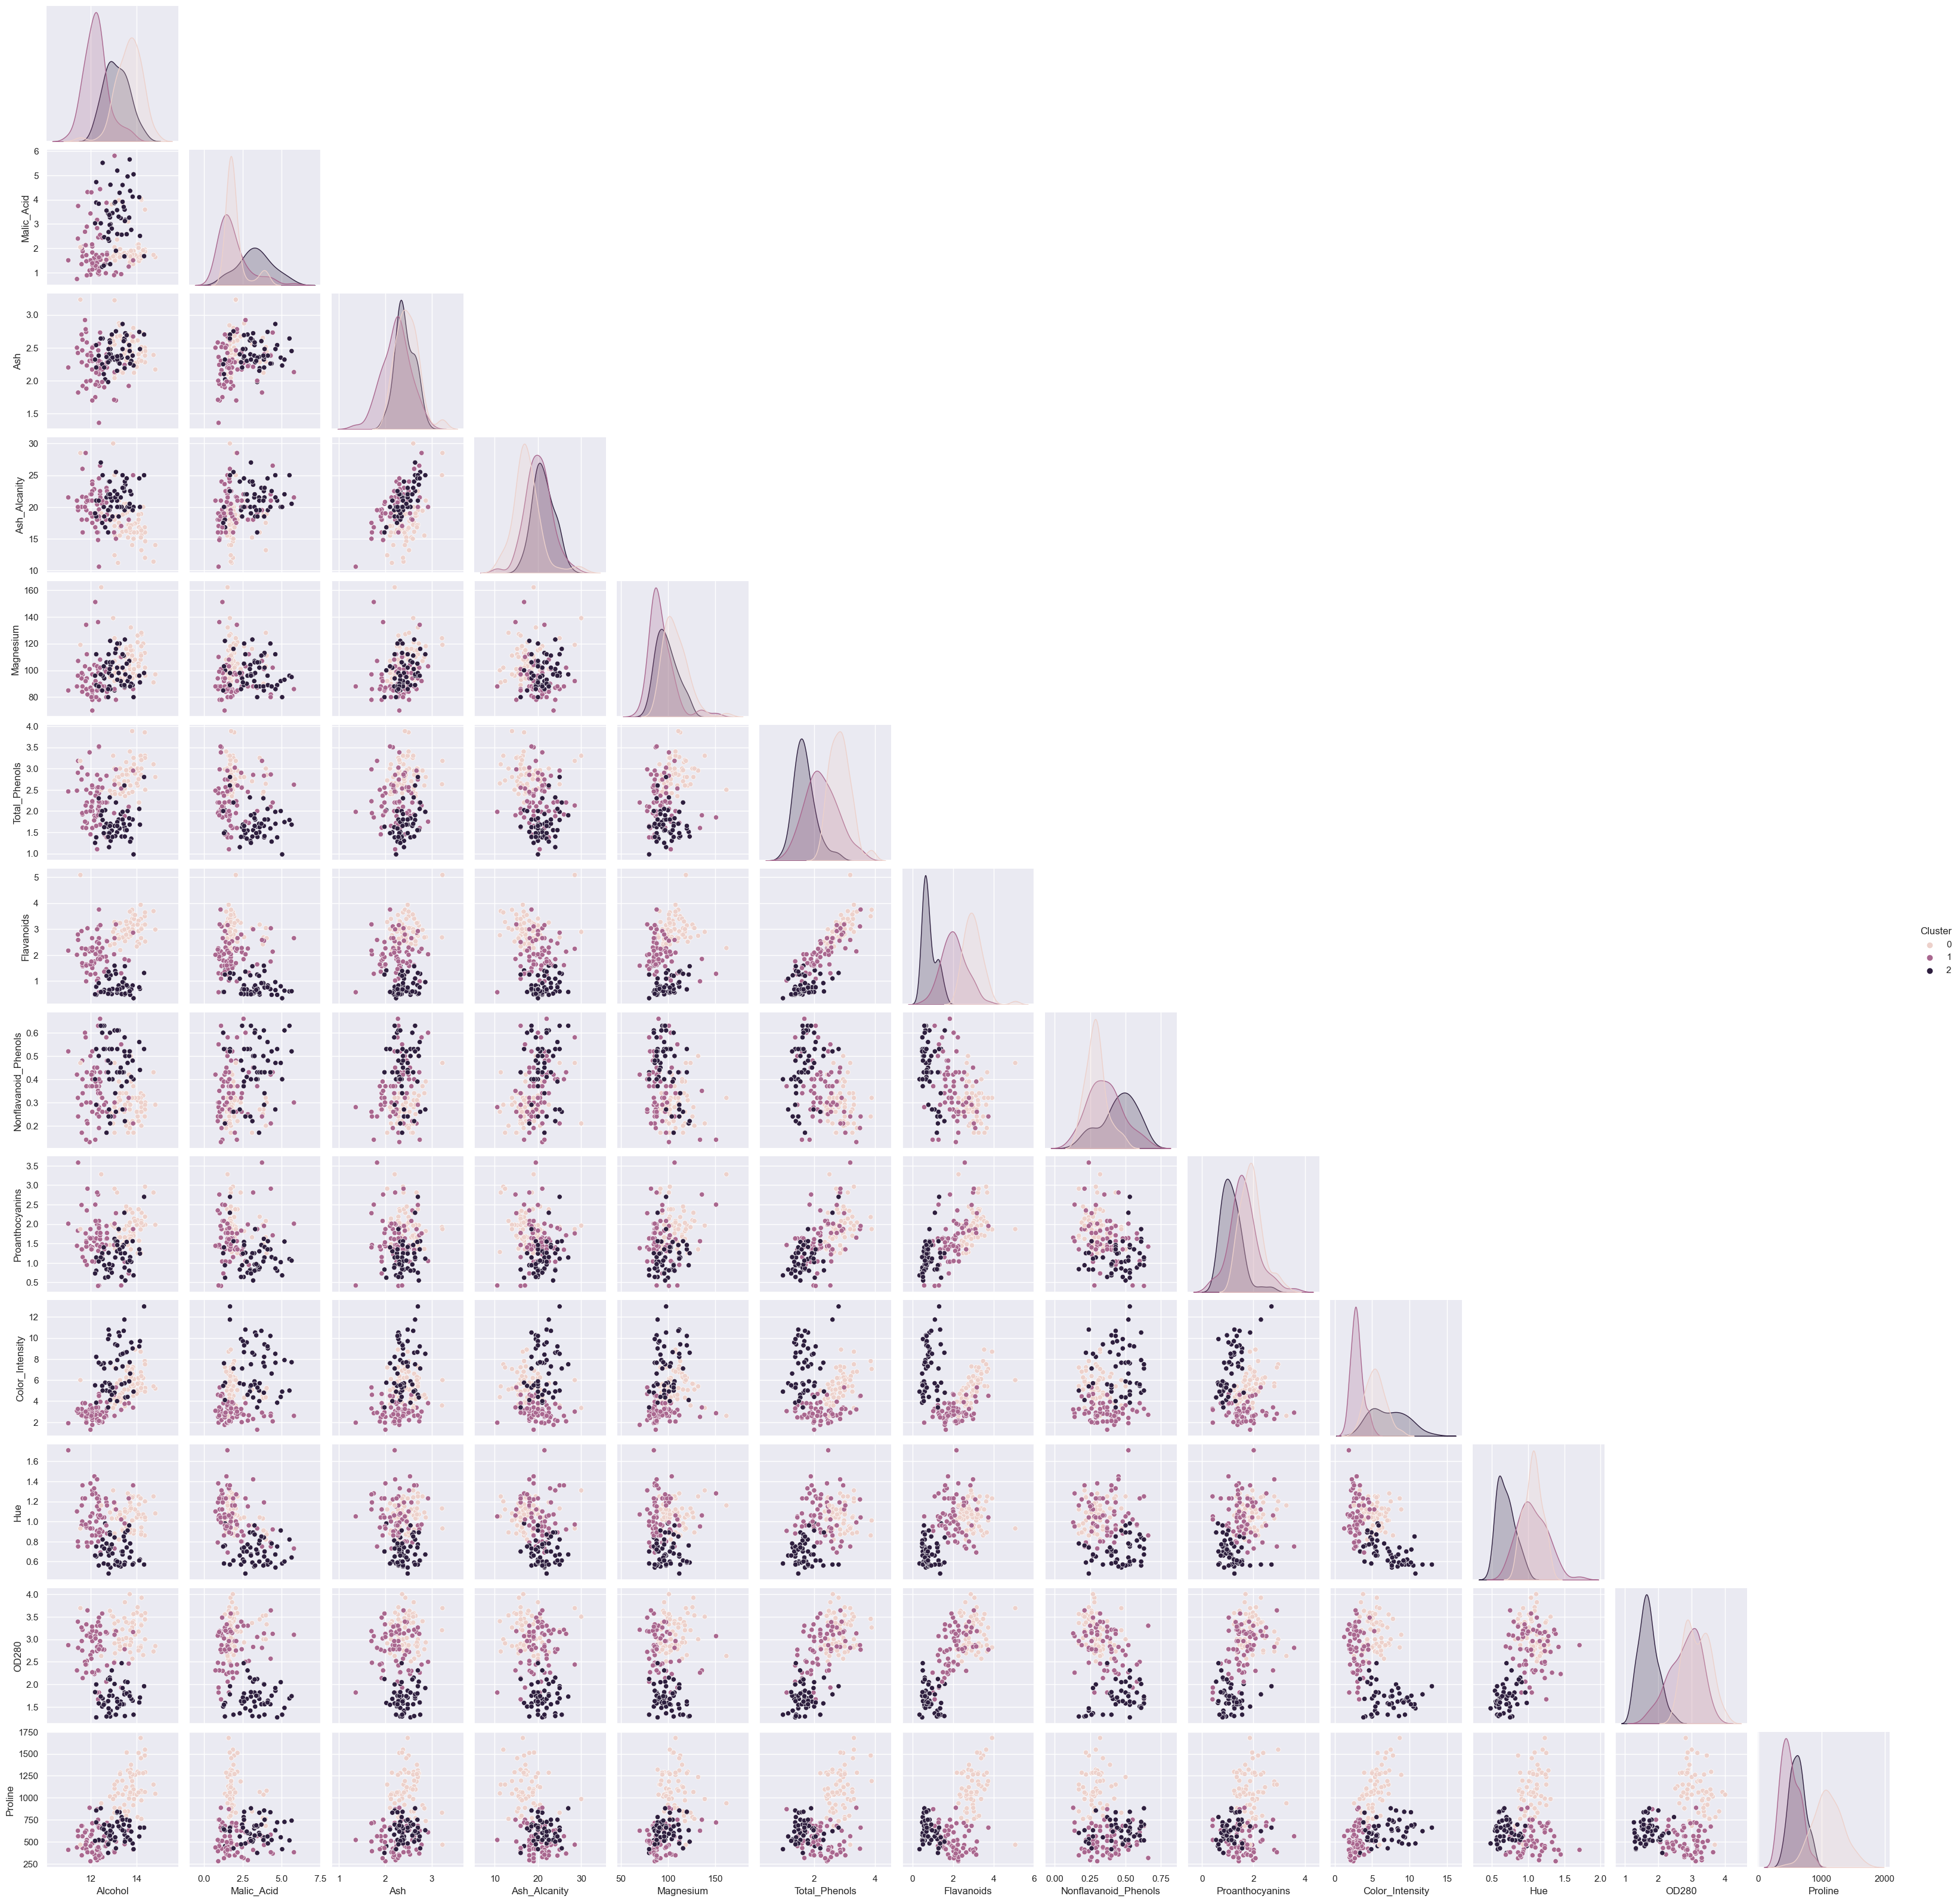

In [47]:
sns.pairplot(df_wine_label, hue='Cluster', corner=True)

### 4.1 Color Intenisty relationships

Further detailed analysis was conducted on the correlations of the color intensity variable because, in the scatterplot of various characteristics, clusters of points with different behaviors can be observed.

I will examine how color intensity is related to the rest of the studied characteristics, both for the entire dataset and for each of the determined clusters. <br>
In the overall dataset, it is observed that color intensity is primarily correlated with the alcohol content in the wine. The correlation coefficient did not show a high value for the total amount of phenols and flavonoids. However, when we repeat this analysis while discriminating by cluster, it is observed that wines corresponding to cluster 0 exhibit the highest correlation with phenol content, particularly with flavonoids. Analyzing the records of cluster 1, although they do not show such a strong correlation, it can be seen in the scatter plot that they follow the trend of cluster 0. In the case of cluster 2, the strong correlation with color intensity occurs with the content of Proanthocyanins and not with the content of flavonoids.

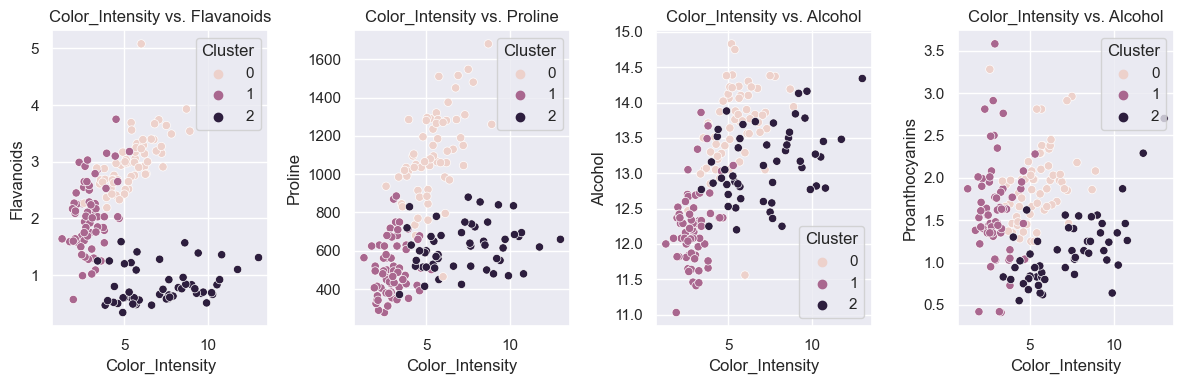

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

#  Color_Intensity vs. Flavanoids
sns.scatterplot(data=df_wine_label, x='Color_Intensity', y='Flavanoids', hue='Cluster', ax=axes[0])
axes[0].set_title('Color_Intensity vs. Flavanoids')

#  Color_Intensity vs. Proline
sns.scatterplot(data=df_wine_label, x='Color_Intensity', y='Proline', hue='Cluster', ax=axes[1])
axes[1].set_title('Color_Intensity vs. Proline')

# Color_Intensity vs. Alcohol
sns.scatterplot(data=df_wine_label, x='Color_Intensity', y='Alcohol', hue='Cluster', ax=axes[2])
axes[2].set_title('Color_Intensity vs. Alcohol')


#  Color_Intensity vs. Alcohol
sns.scatterplot(data=df_wine_label, x='Color_Intensity', y='Proanthocyanins', hue='Cluster', ax=axes[3])
axes[3].set_title('Color_Intensity vs. Alcohol')


plt.tight_layout()


plt.show()


### Correlations all data

In [38]:
data_cluster0=df_wine_label[df_wine_label['Cluster']==0].drop(columns='Cluster')
data_cluster1=df_wine_label[df_wine_label['Cluster']==1].drop(columns='Cluster')
data_cluster2=df_wine_label[df_wine_label['Cluster']==2].drop(columns='Cluster')

In [39]:
data_cluster0_corr=data_cluster0.corr('spearman')
data_cluster1_corr=data_cluster1.corr('spearman')
data_cluster2_corr=data_cluster2.corr('spearman')

all data


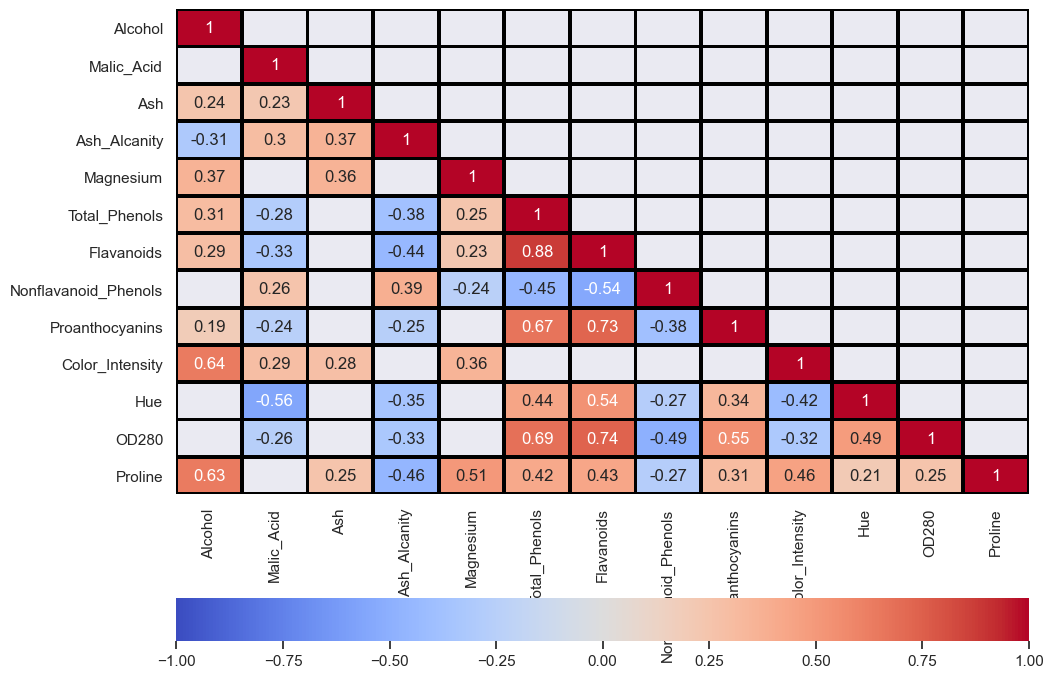

In [40]:
# Plotting with significance filter
corr = df_wine.corr('spearman')                            # get correlation
p_values = corr_sig_spearman(df_wine)                     # get p-Value
mask = np.invert(np.tril(p_values<0.01))    # mask - only get significant corr
print('all data')
plot_cor_matrix(corr,mask)  

### Correlarions Cluster 0

cluster 0


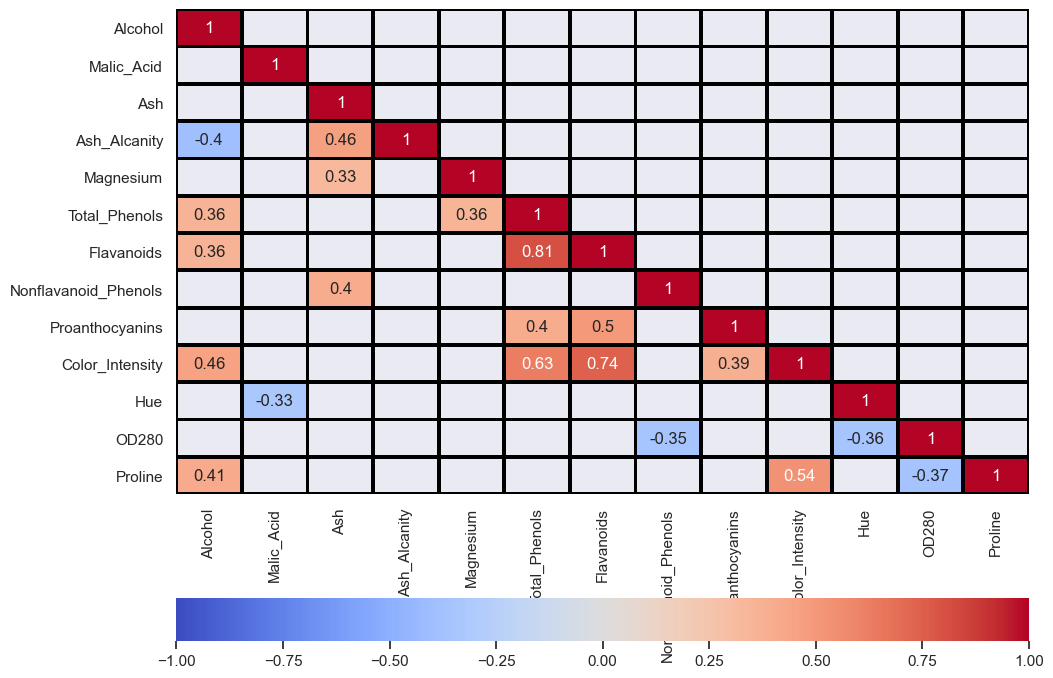

In [41]:
# Plotting with significance filter
corr = data_cluster0.corr('spearman')                            # get correlation
p_values = corr_sig_spearman(data_cluster0)                     # get p-Value
mask = np.invert(np.tril(p_values<0.01))    # mask - only get significant corr
print ('cluster 0')
plot_cor_matrix(corr,mask)  

### Correlations Cluster 1

cluster 1


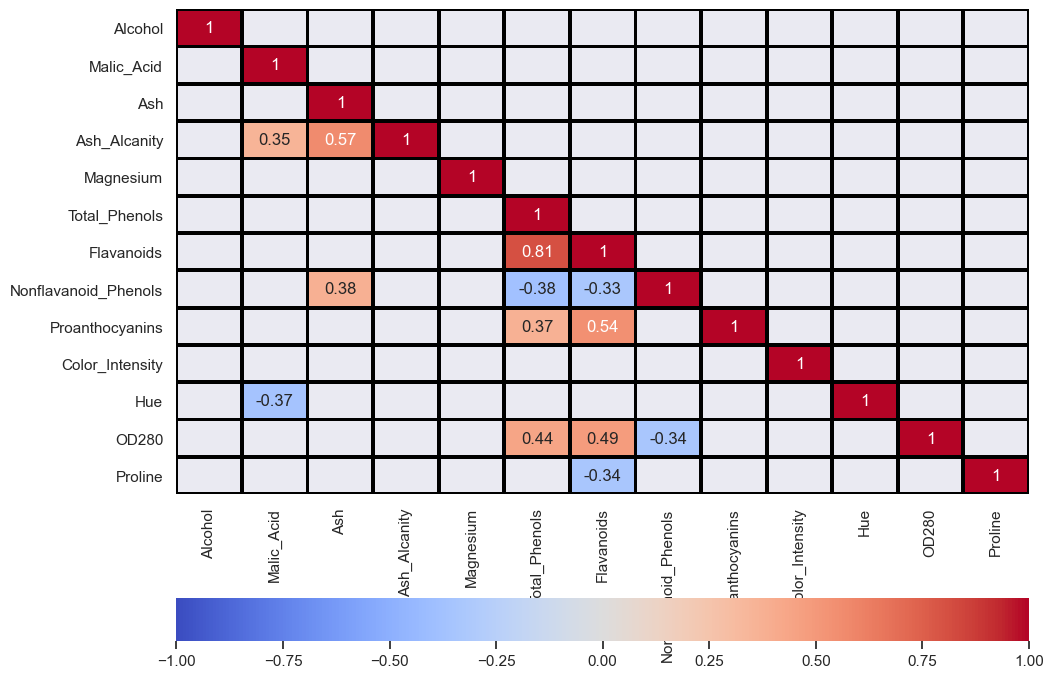

In [42]:
# Plotting with significance filter
corr = data_cluster1.corr('spearman')                            # get correlation
p_values = corr_sig_spearman(data_cluster1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.01))    # mask - only get significant corr
print('cluster 1')
plot_cor_matrix(corr,mask)  

### Correlations Cluster 2

cluster 2


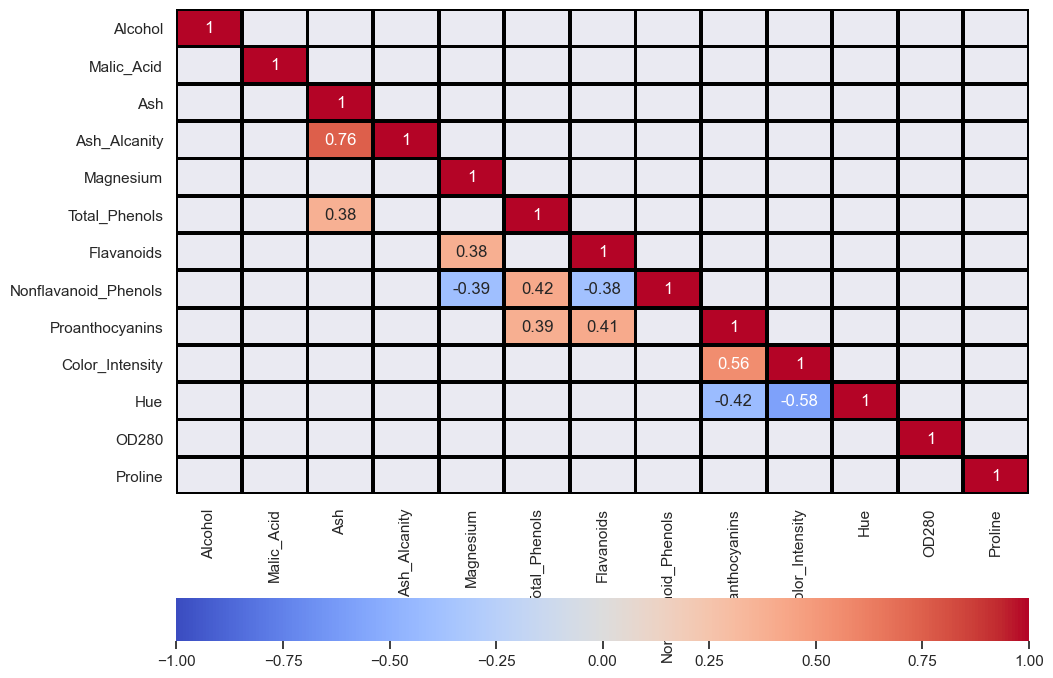

In [43]:
# Plotting with significance filter
corr = data_cluster2.corr('spearman')                            # get correlation
p_values = corr_sig_spearman(data_cluster2)                     # get p-Value
mask = np.invert(np.tril(p_values<0.01)) # mask - only get significant corr
print ('cluster 2')
plot_cor_matrix(corr,mask)  

In summary, analyzing all the data together, it is concluded that alcohol is the characteristic with the highest correlation. However, after clustering and grouping the wines according to their characteristics, other correlations are revealed. The following observations are made:

Wines belonging to cluster 0 (and possibly 1) show a strong correlation with the content of flavonoids, which is more intense than with alcohol.
In the case of cluster two, color intensity correlates with the content of Proanthocyanins.